<a href="https://colab.research.google.com/github/Basharul2002/AI/blob/main/22_47903_2_Week_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

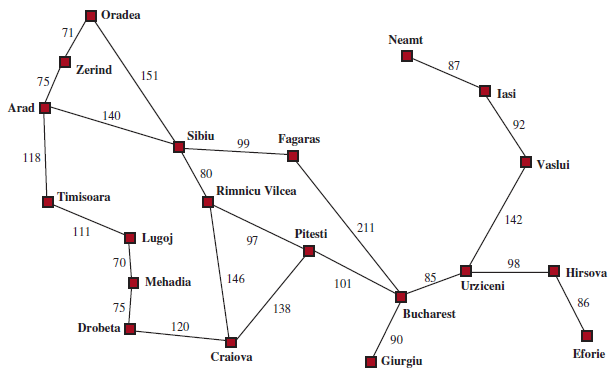

**Figure 3.1** A simplified road map of part of Romania, with road distances in miles.

In [8]:
romanian_map = {
    'Arad': {'Sibiu':140, 'Zerind':75, 'Timisoara':118},
    'Zerind': {'Arad':75, 'Oradea':71},
    'Oradea': {'Zerind':71, 'Sibiu': 151},
    'Sibiu': {'Arad':140, 'Oradea':151, 'Fagaras':99, 'Rimnicu':80},
    'Timisoara': {'Arad': 118, 'Lugoj':111},
    'Lugoj': {'Timisoara':111, 'Mehadia':70},
    'Mehadia': {'Lugoj': 70, 'Drobeta':75},
    'Drobeta': {'Mehadia':75, 'Craiova':120},
    'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
    'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
    'Fagaras': {'Sibiu':99, 'Bucharest':211},
    'Pitesti': {'Rimnicu': 97, 'Craiova':138, 'Bucharest':101},
    'Bucharest': {'Fagaras':211, 'Pitesti': 101, 'Giurgiu':90, 'Urziceni':85},
    'Giurgiu': {'Bucharest': 90},
    'Urziceni': {'Bucharest': 85, 'Vaslui':142, 'Hirsova':98},
    'Hirsova': {'Urziceni':98, 'Eforie':86},
    'Eforie': {'Hirsova':86},
    'Vaslui': {'Iasi': 92, 'Urziceni':142},
    'Iasi': {'Vaslui':92, 'Neamt': 87},
    'Neamt': {'Iasi':87}
}

In [ ]:
romanian_map['Zerind']

{'Arad': 75, 'Oradea': 71}

In [ ]:
list(romanian_map['Arad'].keys())

['Sibiu', 'Zerind', 'Timisoara']

In [ ]:
romanian_map['Arad']['Zerind']

75

In [ ]:
romanian_map['Zerind']['Arad']

75

# BFS

<p style="text-align: justify">Reached is a set of states which has been generated, because once we’ve reached a state, we can never find a better path to the state. That also means we can do an early goal test, checking whether a node is a solution as soon as it is generated, rather than the late goal test that best-first search uses, waiting until a node is popped off the queue.</p>

In [5]:
def bfs(start, goal, G):
    generated= [start] # to store the order of nodes generated
    frontier = [{'Name':start,'Path cost':0, 'Path':[start]}]

    while len(frontier) > 0:
        print('***Frontier', end=': ')

        for node in frontier:
          print(node['Name'], end = ' - ')

        unode  = frontier.pop(0)     # selceting the node to expand
        u = unode['Name']

        print('***')
        print("Expanding: "+u)

        # expand u
        for v in G[u].keys(): # ['Sibiu', 'Zerind', 'Timisoara']
            if v not in generated: # process if v is not /GENERATED yet
                generated.append(v)
                print(v+" generated.")
                cost = unode['Path cost'] + G[u][v]
                path =  unode['Path']+ [v]
                vnode = {'Name': v,'Path cost': cost,'Path': path}
                # goal test
                if v == goal:
                    print('Goal test satisfied.')
                    return vnode # breaking from while
                frontier.append(vnode)# store the generated node in the frontier

    print('Failed')

In [19]:
bfs('Arad', 'Bucharest', romanian_map) # change the soure and destination

***Frontier: Arad - ***
Expanding: Arad
Sibiu generated.
Zerind generated.
Timisoara generated.
***Frontier: Sibiu - Zerind - Timisoara - ***
Expanding: Sibiu
Oradea generated.
Fagaras generated.
Rimnicu generated.
***Frontier: Zerind - Timisoara - Oradea - Fagaras - Rimnicu - ***
Expanding: Zerind
***Frontier: Timisoara - Oradea - Fagaras - Rimnicu - ***
Expanding: Timisoara
Lugoj generated.
***Frontier: Oradea - Fagaras - Rimnicu - Lugoj - ***
Expanding: Oradea
***Frontier: Fagaras - Rimnicu - Lugoj - ***
Expanding: Fagaras
Bucharest generated.
Goal test satisfied.


{'Name': 'Bucharest',
 'Path cost': 450,
 'Path': ['Arad', 'Sibiu', 'Fagaras', 'Bucharest']}

Based on the above BFS simulation, draw the search tree on paper and insert the 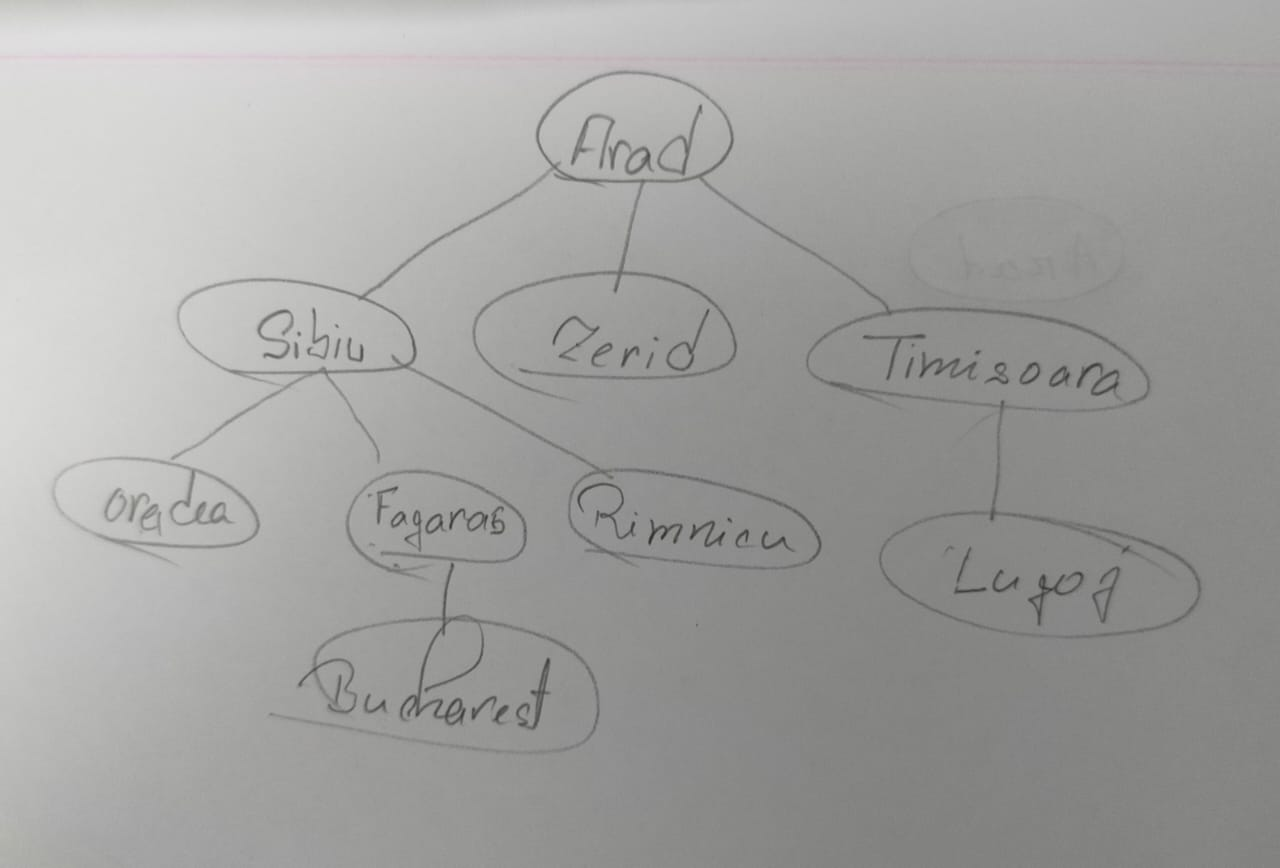image in this cell. (Double Click to edit this cell) <br>
**Image size must be 500 pixel (Horizonal)**

# DFS
Implement DFS using stack,
Implement stack using list (append and pop)

In [30]:
def dfs(start, goal, G):
    expanded = []  # To store the nodes that have been expanded
    frontier = [{'Name': start, 'Path cost': 0, 'Path': [start]}]  # Stack for DFS, starting with the initial node

    while len(frontier) > 0:
        print('*Frontier', end=': ')
        for node in frontier:
            print(node['Name'], end=' - ')
        print('*')

        # Correct the DFS stack behavior by popping from the end
        unode = frontier.pop()  # Popping the last node to implement DFS
        u = unode['Name']
        print("Expanding: " + u)

        # Goal test
        if u == goal:
            print('Goal test satisfied.')
            return unode  # Return the goal node details if found

        # Update the expanded list
        expanded.append(u)

        # Expand the node u
        for v in G[u].keys():
            if v not in expanded and all(v != node['Name'] for node in frontier):  # Only generate if not expanded and not in frontier
                print(v + " generated.")
                cost = unode['Path cost'] + G[u][v]
                path = unode['Path'] + [v]
                vnode = {'Name': v, 'Path cost': cost, 'Path': path}
                frontier.append(vnode)  # Add the generated node to the frontier

    print('Failed')


In [35]:
# call DFS here for the Romanian map
dfs('Arad', 'Bucharest', romanian_map) # change the soure and destination

*Frontier: Arad - *
Expanding: Arad
Sibiu generated.
Zerind generated.
Timisoara generated.
*Frontier: Sibiu - Zerind - Timisoara - *
Expanding: Timisoara
Lugoj generated.
*Frontier: Sibiu - Zerind - Lugoj - *
Expanding: Lugoj
Mehadia generated.
*Frontier: Sibiu - Zerind - Mehadia - *
Expanding: Mehadia
Drobeta generated.
*Frontier: Sibiu - Zerind - Drobeta - *
Expanding: Drobeta
Craiova generated.
*Frontier: Sibiu - Zerind - Craiova - *
Expanding: Craiova
Rimnicu generated.
Pitesti generated.
*Frontier: Sibiu - Zerind - Rimnicu - Pitesti - *
Expanding: Pitesti
Bucharest generated.
*Frontier: Sibiu - Zerind - Rimnicu - Bucharest - *
Expanding: Bucharest
Goal test satisfied.


{'Name': 'Bucharest',
 'Path cost': 733,
 'Path': ['Arad',
  'Timisoara',
  'Lugoj',
  'Mehadia',
  'Drobeta',
  'Craiova',
  'Pitesti',
  'Bucharest']}

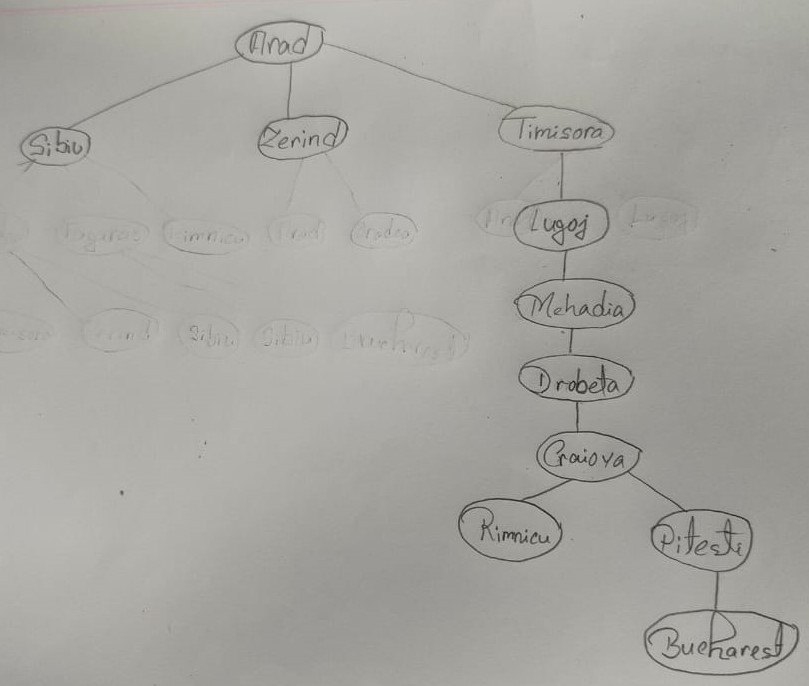

# Another Example

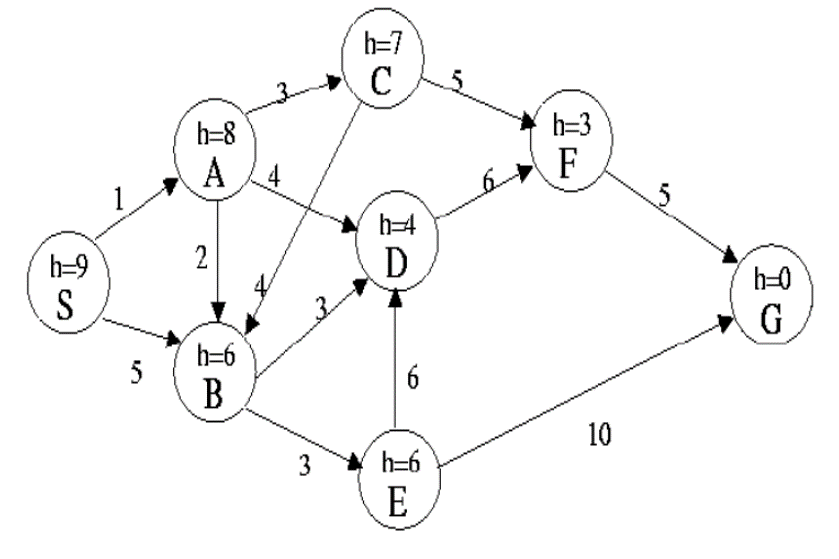

In [32]:
example_graph = {
    'S': {'A': 1, 'B': 5},
    'A': {'B': 2, 'C': 3},
    'B': {'D': 3, 'E' : 3},
    'C': {'B': 4, 'F' : 5},
    'D': {'F': 6},
    'E': {'D': 6, 'G': 10},
    'F': {'G': 5},
    'G': {}
}

In the above graph the start state is **S**, and the goal state is **G**. The transition costs are next to the edges, and the heuristic estimate, h, of the distance from the state to the goal is in the state’s node.
<br>
Use **BFS** and  **DFS** for this graph.

In [40]:
bfs('S', 'G', example_graph)

***Frontier: S - ***
Expanding: S
A generated.
B generated.
***Frontier: A - B - ***
Expanding: A
C generated.
***Frontier: B - C - ***
Expanding: B
D generated.
E generated.
***Frontier: C - D - E - ***
Expanding: C
F generated.
***Frontier: D - E - F - ***
Expanding: D
***Frontier: E - F - ***
Expanding: E
G generated.
Goal test satisfied.


{'Name': 'G', 'Path cost': 18, 'Path': ['S', 'B', 'E', 'G']}

Based on the above BFS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

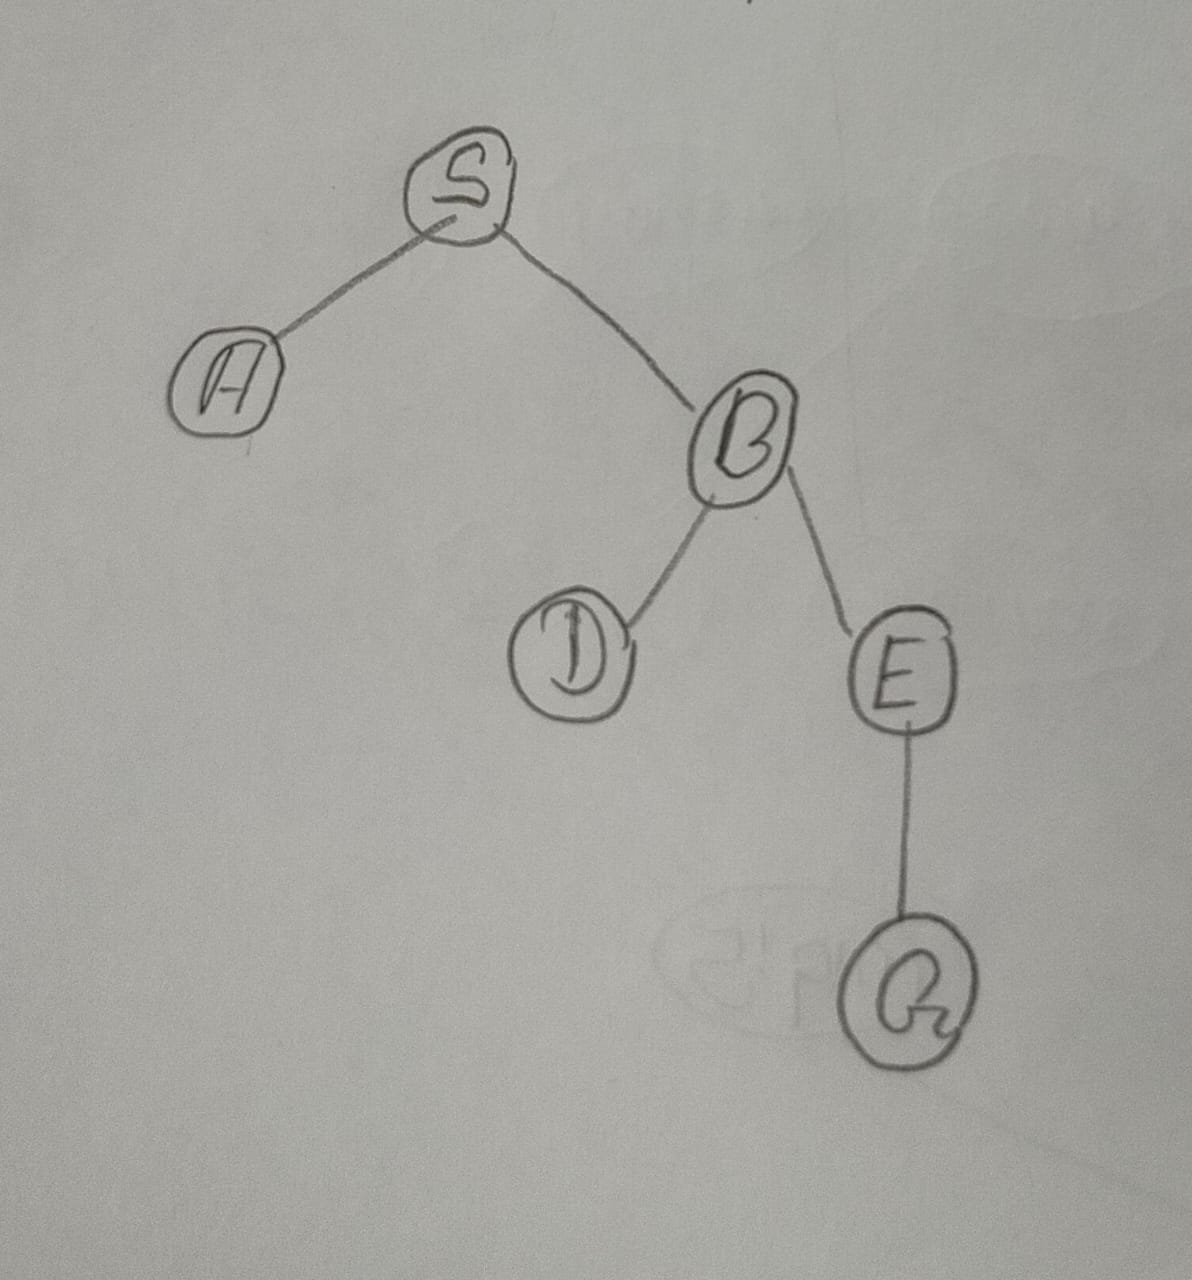



In [41]:
dfs('S', 'G', example_graph)

*Frontier: S - *
Expanding: S
A generated.
B generated.
*Frontier: A - B - *
Expanding: B
D generated.
E generated.
*Frontier: A - D - E - *
Expanding: E
G generated.
*Frontier: A - D - G - *
Expanding: G
Goal test satisfied.


{'Name': 'G', 'Path cost': 18, 'Path': ['S', 'B', 'E', 'G']}

Based on the above DFS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)

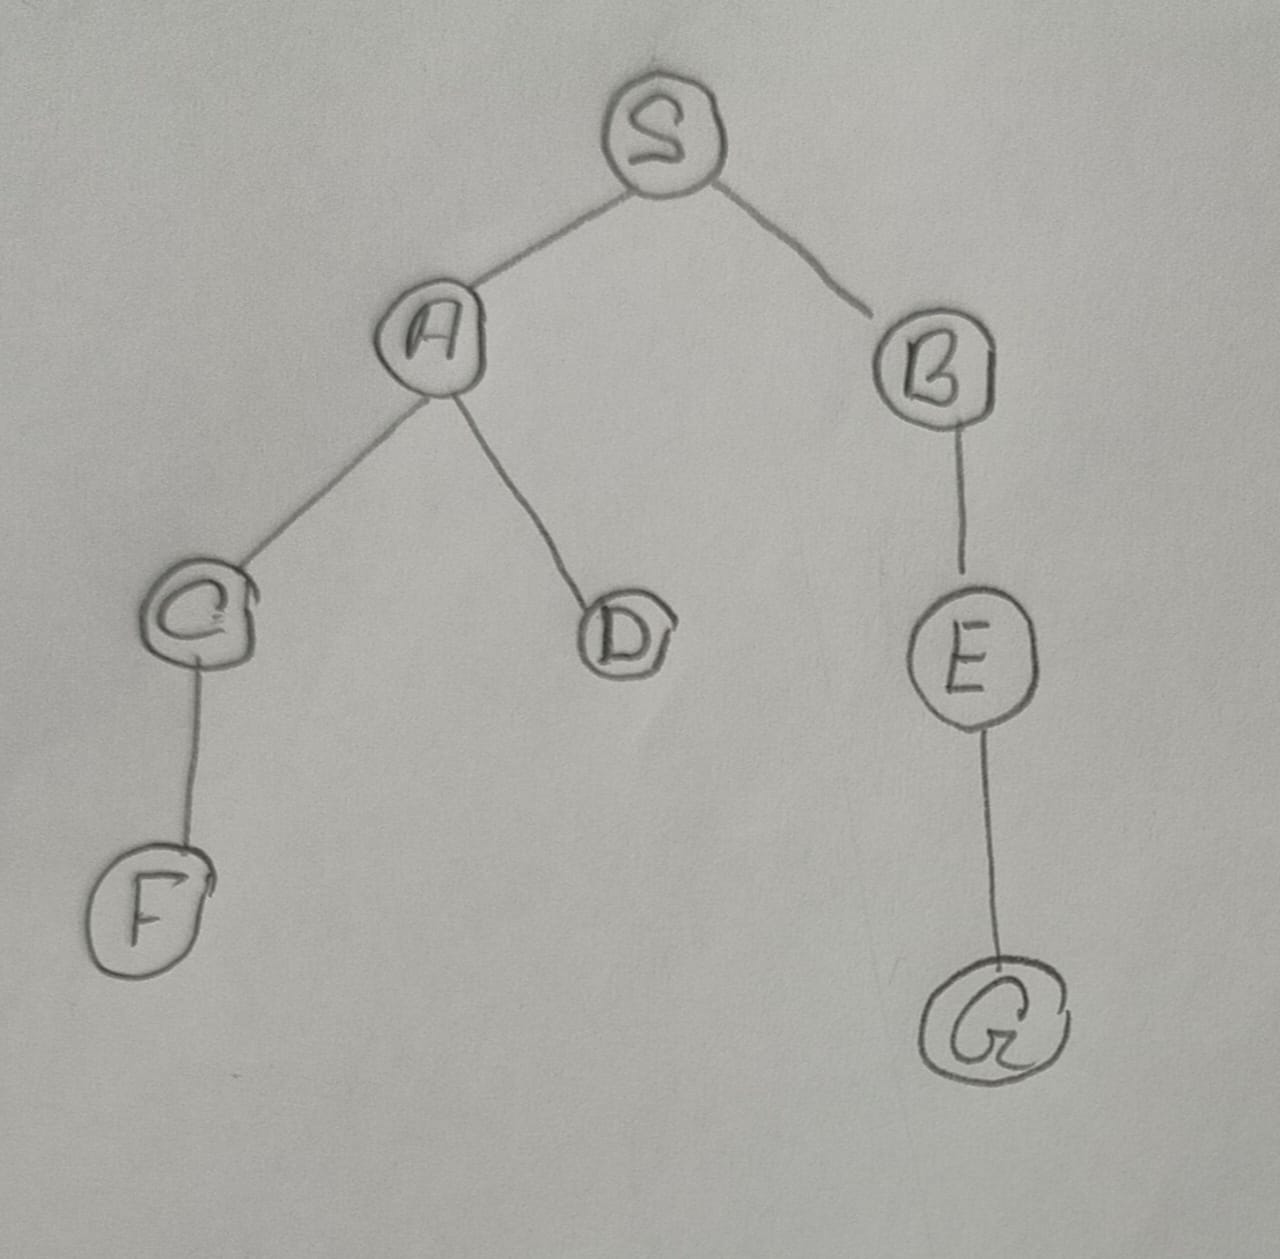

# New Exercise